<a href="https://colab.research.google.com/github/AmritRaj369/Data-analysis-projects/blob/main/Python%20Projects/Blinkit_Business_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Blinkit Business Analyis**

##Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Importing Raw Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving blinkit_data.csv to blinkit_data (1).csv


In [ ]:
df = pd.read_csv("blinkit_data.csv")

##Viewing Sample Data

In [ ]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


###size of data

In [ ]:
print("size of data: ", df.shape)

size of data:  (8523, 12)


###Field Info

In [ ]:
df.isnull().sum()

,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,1463


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


###Data cleaining

In [ ]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})

In [ ]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


#**Business Requirement**

###KPI's Requirement

In [ ]:
#total sales
total_sales = df['Sales'].sum()

#Average sales
avg_sales = df['Sales'].mean()

#No. of item sold
no_of_item_sold = df['Sales'].count()

#average rating
avg_rating = df['Rating'].mean()

#display
print(f"Total Sales:  ${total_sales:,.0f}")
print(f"Average Sales:  ${avg_sales:,.0f}")
print(f"No. of Item Sold: {no_of_item_sold:,.0f}")
print(f"Average Rating: {avg_rating:,.1f}")


Total Sales:  $1,201,681
Average Sales:  $141
No. of Item Sold: 8,523
Average Rating: 4.0


#**Chart Requirement**

###Total Sales By Fat Content

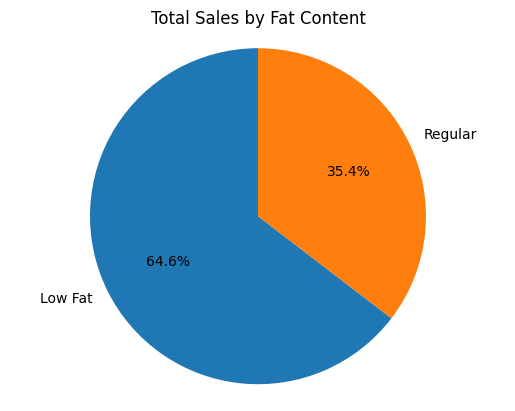

In [ ]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat, labels=sales_by_fat.index, autopct='%.1f%%', startangle=90)#just check why we need 2 % here %.1f%% at last=================================
#what does autopct does like whats the difference between %.1f%% and %1.1f%%
plt.axis('equal')
plt.title('Total Sales by Fat Content')
plt.show()


###Total Sales By Item Type

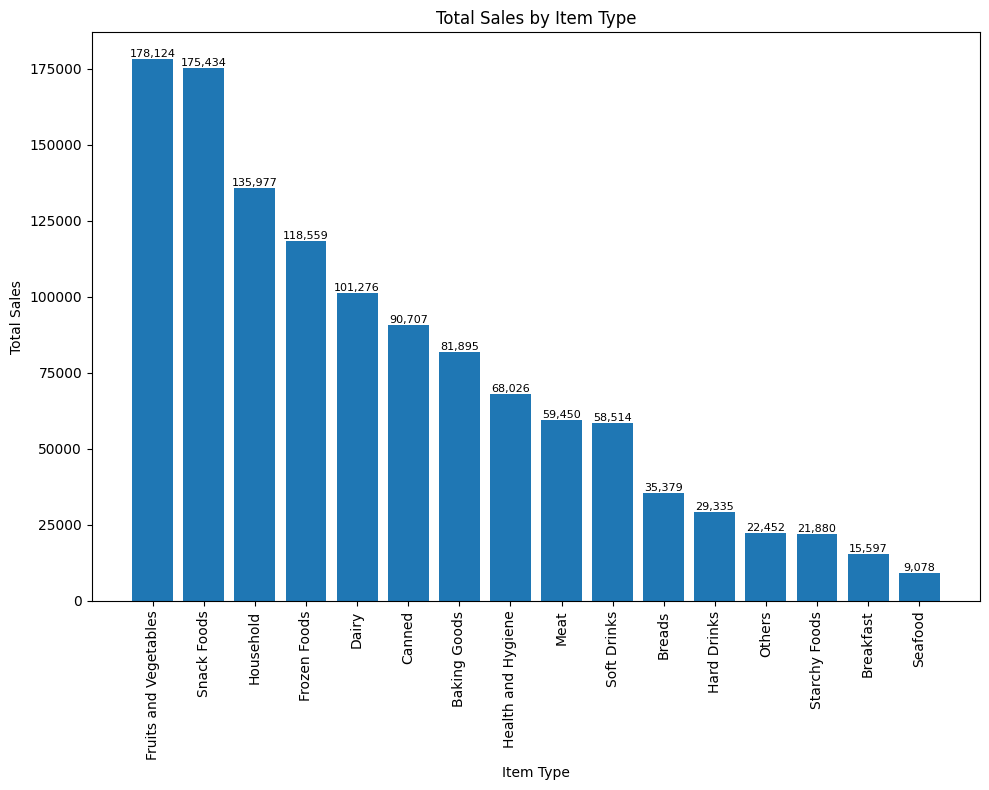

In [ ]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending = False)
plt.figure(figsize = (10,8))
bars = plt.bar(sales_by_type.index, sales_by_type.values)
plt.xticks(rotation = 90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')
for bars in bars:
  plt.text(bars.get_x() + bars.get_width()/2, bars.get_height(), f"{bars.get_height():,.0f}", ha = 'center', va = 'bottom', fontsize = 8)
plt.tight_layout()
plt.show()

###Fat Content By Outlet For Total Sales

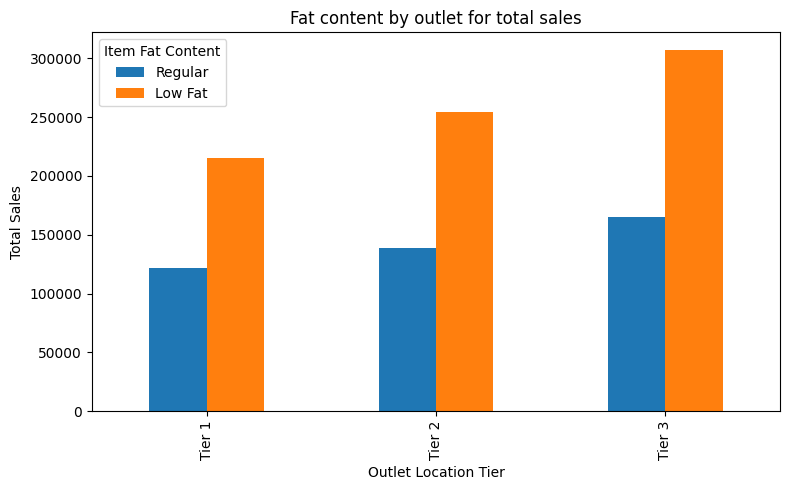

In [ ]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]

grouped.plot(kind = 'bar', figsize = (8, 5), title = 'Fat content by outlet for total sales')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title = 'Item Fat Content')
plt.tight_layout()
plt.show()

#🧠 So What Does grouped[['Regular', 'Low Fat']] Do?
#It selects only the 'Regular' and 'Low Fat' columns from the grouped DataFrame — in that order — and discards any other fat content categories.

#This is likely done to:
#Focus on the two main categories of interest.
#Avoid issues caused by inconsistent labels (like 'low fat' vs 'Low Fat').
#Ensure a consistent order for plotting.

###Total Sales By Outlet Establishment

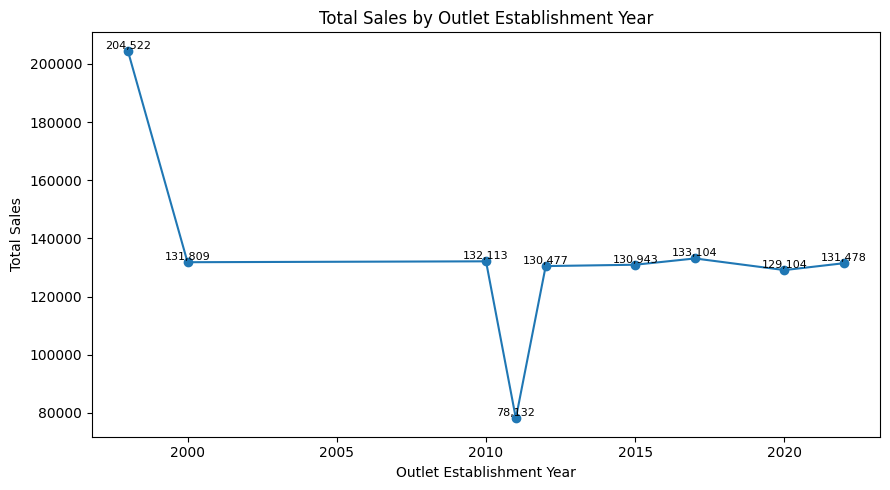

In [ ]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize = (9, 5))
plt.plot(sales_by_year.index, sales_by_year.values, marker = 'o', linestyle = '-')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Establishment Year')

for x, y in zip(sales_by_year.index, sales_by_year.values):
  plt.text(x,y ,f"{y:,.0f}", ha = 'center', va = 'bottom', fontsize = 8)
plt.tight_layout()
plt.show()
#

###Sales By Outlet Size

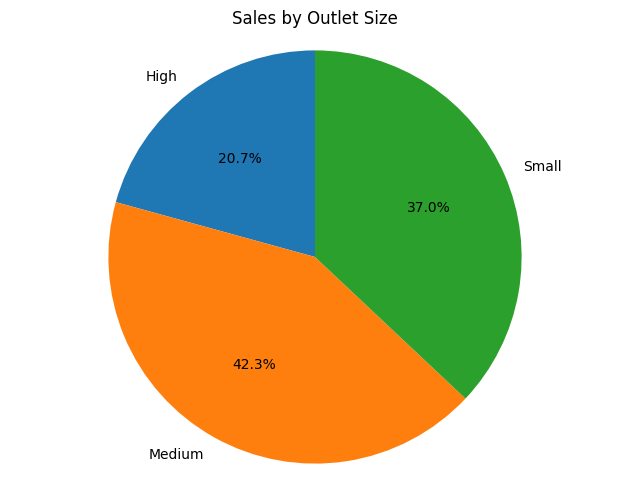

In [ ]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()
plt.pie(sales_by_size, labels=sales_by_size.index, autopct = '%1.1f%%', startangle = 90)
plt.axis('equal')
plt.tight_layout()
plt.title('Sales by Outlet Size')
plt.show()

###Sales By Outlet Location

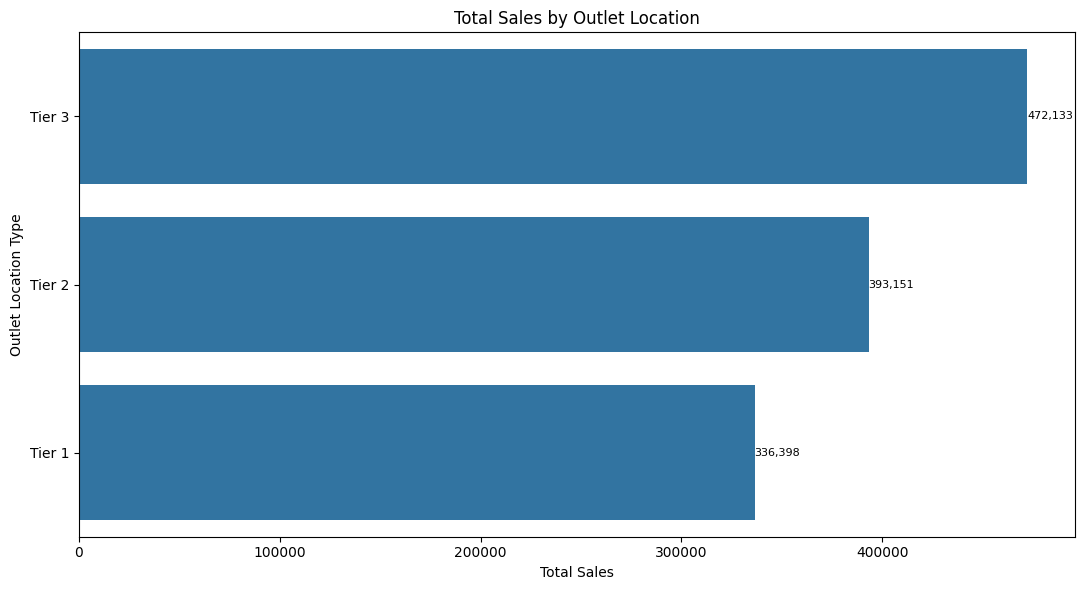

In [ ]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values(by = 'Sales', ascending = False)
plt.figure(figsize =  (11, 6))
ax = sns.barplot(x = 'Sales', y = 'Outlet Location Type', data = sales_by_location)
plt.ylabel('Outlet Location Type')
plt.xlabel('Total Sales')
plt.title('Total Sales by Outlet Location')
for bar in ax.patches:
    ax.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():,.0f}",
        ha='left', va='center', fontsize=8
    )


plt.tight_layout()
plt.show()

In [ ]:
df.head(9)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,Low Fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
